In [1]:
import numpy as np
from pynq import Overlay, allocate
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
overlay = Overlay("/home/xilinx/jupyter_notebooks/VINIT/vinit.bit")
overlay.ip_dict.keys()

dict_keys(['mnist_2_0', 'axi_intc_0', 'processing_system7_0'])

In [3]:
image_path = "/home/xilinx/jupyter_notebooks/VINIT/Row1005.png"
image = Image.open(image_path)
bw_image = image.convert('L')
ip_image = np.array(bw_image,dtype=int).flatten()
#kern = np.array([0,-1,0,-1,5,-1,0,-1,0],dtype=int)

in_buff = allocate(shape=(784,), dtype=int)

    
#kern_buff = allocate(shape=(9,), dtype=int)
out_buff = allocate(shape=(1,),dtype=int)
np.copyto(in_buff,ip_image)
in_buff = in_buff
#np.copyto(kern_buff,kern)
print(in_buff)
#print(kern_buff)

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  38 115 217 156  48   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0  30 140 233 254 254 254 246  44   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  28 236 254 254 199 108 152 252 182   0   0   0   

In [4]:
my_ip = overlay.mnist_2_0
reg_map = my_ip.register_map
reg_map

RegisterMap {
  CTRL = Register(AP_START=0, AP_DONE=0, AP_IDLE=1, AP_READY=0, RESERVED_1=0, AUTO_RESTART=0, RESERVED_2=0, INTERRUPT=0, RESERVED_3=0),
  GIER = Register(Enable=0, RESERVED=0),
  IP_IER = Register(CHAN0_INT_EN=0, CHAN1_INT_EN=0, RESERVED_0=0),
  IP_ISR = Register(CHAN0_INT_ST=0, CHAN1_INT_ST=0, RESERVED_0=0),
  input_r_1 = Register(input_r=write-only),
  input_r_2 = Register(input_r=write-only),
  output_r_1 = Register(output_r=write-only),
  output_r_2 = Register(output_r=write-only)
}

In [5]:
my_ip.register_map.input_r_1 = in_buff.physical_address 
#my_ip.register_map.b_1 = kern_buff.physical_address
my_ip.register_map.output_r_1 = out_buff.physical_address

In [6]:
my_ip.write(0x0,0x81)

In [7]:
in_buff.physical_address

377786368

In [8]:
my_ip.register_map.CTRL.AP_DONE

0

original digit is : 


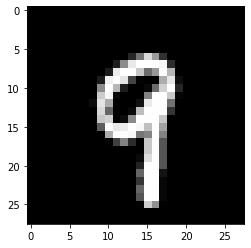

In [9]:
plt.imshow(in_buff.reshape(28,28),cmap="gray")
print("original digit is : ")
plt.show()

In [10]:

print("classified digit is " + str(out_buff))


classified digit is [9]


In [11]:
# x_test = np.load("my_data.npy")
# # y_test = np.load("labels.npy")
# x_test.head()

In [12]:

# def test(img):
#   my_ip.write(0x0,0x81)
#   np.copyto(in_buff,img)
#   my_ip.input_r = in_buff.physical_address
#   my_ip.output_r = out_buff.physical_address
#   return out_buff

# count = 0
# for i in range(len(x_test)):
#   img = x_test[i].reshape(784,)
#   res = test(img)
#   print(res,y_test[i])
#   if(res==y_test[i]):
#      count += 1
    
# print(count)

In [13]:
# C:\\Users\\hello\\Desktop\\Row1358.png


# from PIL import Image

# # Load the image
# image_path = ""
# image = Image.open(image_path)

# # Get the pixel values
# pixels = list(image.getdata())

# # If you need the pixel values in a 2D array (list of lists)
# width, height = image.size
# pixels_2d = [pixels[i * width:(i + 1) * width] for i in range(height)]

# # Example: print the pixel values
# print(pixels)
# # or
# print(pixels_2d)
